<a href="https://colab.research.google.com/github/Ajlag/cifar10_neural_network/blob/main/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,  models
import matplotlib.pyplot as plt


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'car','deer', 'dog','frog','horse','ship','truck']

In [ ]:
train_images.max()

255

In [ ]:
train_images.min()

0

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images.max()

1.0

In [ ]:
train_images.min()

0.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
#pravi se 32 filtera za svaki kanal odvojeno, a imamo 3 kanala RBG
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [ ]:
epochs = 10
batch_size = 64
num_classes = 10

train_label_cat = tf.keras.utils.to_categorical(train_labels, num_classes)
test_label_cat = tf.keras.utils.to_categorical(test_labels,num_classes)

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(train_images, train_label_cat, epochs = epochs, batch_size=64, validation_data=(test_images, test_label_cat))

Epoch 1/10
782/782 [==============================] - 65s 81ms/step - loss: 1.5471 - accuracy: 0.4339 - val_loss: 1.2917 - val_accuracy: 0.5431
Epoch 2/10
782/782 [==============================] - 65s 83ms/step - loss: 1.1979 - accuracy: 0.5776 - val_loss: 1.1337 - val_accuracy: 0.6062
Epoch 3/10
782/782 [==============================] - 65s 83ms/step - loss: 1.0328 - accuracy: 0.6372 - val_loss: 1.0576 - val_accuracy: 0.6296
Epoch 4/10
782/782 [==============================] - 64s 82ms/step - loss: 0.9299 - accuracy: 0.6770 - val_loss: 0.9651 - val_accuracy: 0.6644
Epoch 5/10
782/782 [==============================] - 64s 82ms/step - loss: 0.8550 - accuracy: 0.7028 - val_loss: 1.0102 - val_accuracy: 0.6493
Epoch 6/10
782/782 [==============================] - 63s 81ms/step - loss: 0.7933 - accuracy: 0.7240 - val_loss: 0.8548 - val_accuracy: 0.7022
Epoch 7/10
782/782 [==============================] - 62s 80ms/step - loss: 0.7456 - accuracy: 0.7409 - val_loss: 0.8569 - val_accuracy:

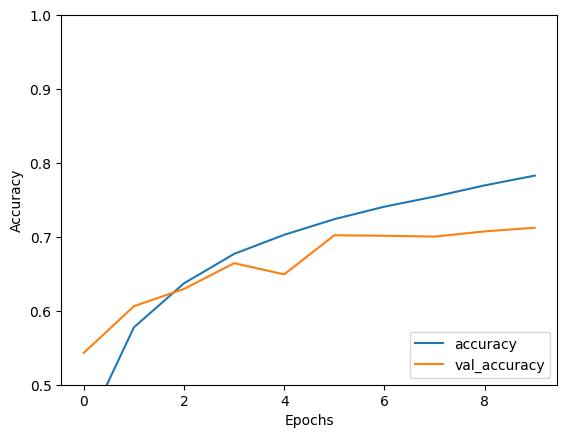

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_label_cat, verbose=2)

313/313 - 4s - loss: 0.8344 - accuracy: 0.7124 - 4s/epoch - 12ms/step


In [ ]:
! mkdir models


In [ ]:
! ls

models	sample_data


In [ ]:
model_path = "models/basic_network.h5"
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
! ls models/

basic_network.h5


In [ ]:
backup_model = model
model = None

In [ ]:
print(model)

None


In [ ]:
model = tf.keras.models.load_model(model_path)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             